In [10]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import *

In [15]:
from google.colab import files
upload = files.upload()


Saving foreign.csv to foreign.csv


In [19]:
for_df= pd.read_csv("foreign.csv")

for_df.head()

,district,date,month,year,visitors
0,Adilabad,01-01-16,January,2016,2
1,Adilabad,01-02-16,February,2016,0
2,Adilabad,01-03-16,March,2016,2
3,Adilabad,01-04-16,April,2016,0
4,Adilabad,01-05-16,May,2016,0


In [20]:
from google.colab import files
upload=files.upload()

Saving domestic.csv to domestic.csv


In [22]:
dom_df=pd.read_csv("domestic.csv")
dom_df.head()

,district,date,month,year,visitors
0,Adilabad,01-01-16,January,2016,792136
1,Adilabad,01-02-16,February,2016,937820
2,Adilabad,01-03-16,March,2016,582946
3,Adilabad,01-04-16,April,2016,341948
4,Adilabad,01-05-16,May,2016,252887


In [23]:
#Merging DataFrames
df = pd.merge(dom_df, for_df, on=['district', 'date', 'month', 'year'], suffixes=('_domestic', '_foreign'), how='inner')

In [24]:
df.head()

,district,date,month,year,visitors_domestic,visitors_foreign
0,Adilabad,01-01-16,January,2016,792136,2
1,Adilabad,01-02-16,February,2016,937820,0
2,Adilabad,01-03-16,March,2016,582946,2
3,Adilabad,01-04-16,April,2016,341948,0
4,Adilabad,01-05-16,May,2016,252887,0


In [26]:
#Converting null values to 0
df['visitors_domestic'].fillna(0,inplace=True)
df['visitors_foreign'].fillna(0,inplace=True)

In [27]:
#converting float into int
df['visitors_domestic']=df['visitors_domestic'].astype(int)
df['visitors_foreign']=df['visitors_foreign'].astype(int)

In [29]:
#calculating total visitors
df['Total_visitors']=df['visitors_foreign']+df['visitors_domestic']
df

,district,date,month,year,visitors_domestic,visitors_foreign,Total_visitors
0,Adilabad,01-01-16,January,2016,792136,2,792138
1,Adilabad,01-02-16,February,2016,937820,0,937820
2,Adilabad,01-03-16,March,2016,582946,2,582948
3,Adilabad,01-04-16,April,2016,341948,0,341948
4,Adilabad,01-05-16,May,2016,252887,0,252887
...,...,...,...,...,...,...,...
1495,Yadadri Bhongir,01-08-19,August,2019,389010,0,389010
1496,Yadadri Bhongir,01-09-19,September,2019,366862,0,366862
1497,Yadadri Bhongir,01-10-19,October,2019,381860,0,381860
1498,Yadadri Bhongir,01-11-19,November,2019,365990,0,365990


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   district           1500 non-null   object
 1   date               1500 non-null   object
 2   month              1500 non-null   object
 3   year               1500 non-null   int64 
 4   visitors_domestic  1500 non-null   int64 
 5   visitors_foreign   1500 non-null   int64 
 6   Total_visitors     1500 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 93.8+ KB


In [34]:
df.isnull().sum()   # no null values

district             0
date                 0
month                0
year                 0
visitors_domestic    0
visitors_foreign     0
Total_visitors       0
dtype: int64

Proportion of Visitors

In [35]:
total_dom = df['visitors_domestic'].sum()
total_for = df['visitors_foreign'].sum()

In [37]:
prop_dom_for = total_dom / total_for
print(prop_dom_for)

print(F"Proportion of domestic visitors to foreign visitors: {prop_dom_for}")

335.838684355278
Proportion of domestic visitors to foreign visitors: 335.838684355278


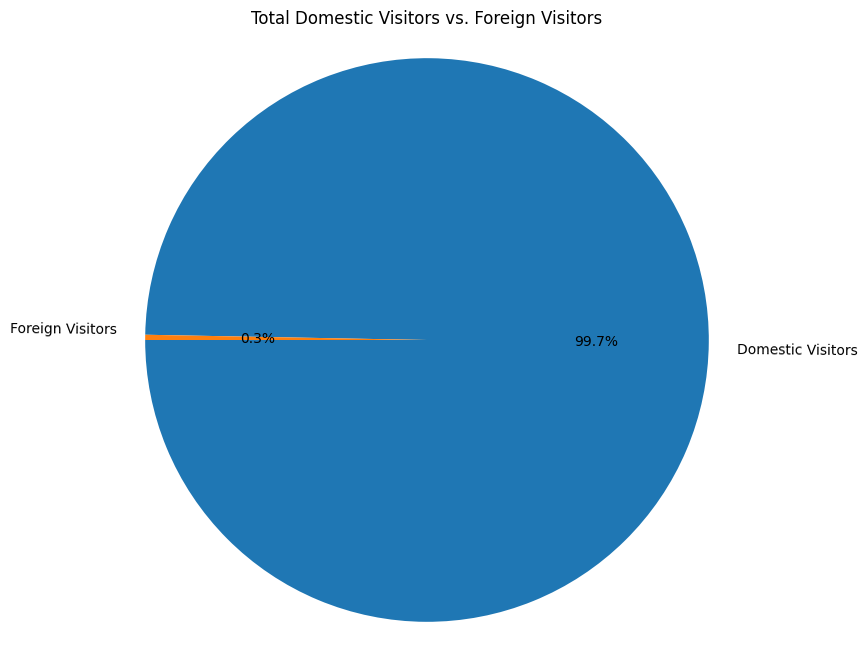

In [38]:
total_domestic_visitors = df['visitors_domestic'].sum()
total_foreign_visitors = df['visitors_foreign'].sum()

#Ddata for the pie chart
visitor_counts = [total_domestic_visitors, total_foreign_visitors]
visitor_labels = ['Domestic Visitors', 'Foreign Visitors']

#Pie chart
plt.figure(figsize=(8, 8))
plt.pie(visitor_counts, labels=visitor_labels, autopct='%1.1f%%', startangle=180, rotatelabels=True)
plt.title('Total Domestic Visitors vs. Foreign Visitors')
plt.axis('equal')

plt.show()

Districts with No Visitors for an Entire Year

In [41]:
grouped_data = df.groupby(['district', 'year'])
no_visitors_df = grouped_data.filter(lambda x: x['Total_visitors'].sum() == 0)

unique_no_visitors_districts_years = no_visitors_df[['district', 'year']].drop_duplicates()

print("Districts and years with no visitors for an entire year:")
print(unique_no_visitors_districts_years)

Districts and years with no visitors for an entire year:
                    district  year
120   Komaram Bheem Asifabad  2016
180                 Medchal   2016
264              Ranga Reddy  2016
300                 Suryapet  2016
312                Vikarabad  2016
552                 Medchal   2017
636              Ranga Reddy  2017
672                 Suryapet  2017
684                Vikarabad  2017
924                 Medchal   2018
1008             Ranga Reddy  2018
1044                Suryapet  2018
1056               Vikarabad  2018
1296                Medchal   2019
1392             Ranga Reddy  2019
1428                Suryapet  2019
1440               Vikarabad  2019


Districts with No Foreign Visitors for an Entire Year¶


In [42]:
districts = df.groupby(['district', 'year'])['visitors_foreign'].sum().reset_index()
districts = districts[districts['visitors_foreign'] == 0]

print("\nDistricts with no foreign visitors for an entire year:")
print(districts['district'].unique())

percent = (len(districts['district'].unique()) / len(df['district'].unique())) * 100
print(f"\nPercentage of districts not visited by foreign visitors: {percent}%")


Districts with no foreign visitors for an entire year:
['Bhadradri Kothagudem ' 'Jagtial ' 'Jangaon ' 'Kamareddy ' 'Karimnagar '
 'Khammam' 'Komaram Bheem Asifabad' 'Mahabubabad ' 'Mancherial' 'Medak '
 'Medchal ' 'Nalgonda' 'Nirmal' 'Nizamabad' 'Peddapalli'
 'Rajanna Sircilla ' 'Ranga Reddy' 'Sangareddy ' 'Siddipet' 'Suryapet'
 'Vikarabad' 'Wanaparthy ' 'Warangal (Rural)' 'Yadadri Bhongir']

Percentage of districts not visited by foreign visitors: 75.0%


Preferred Destinations between Domestic and Foreign Tourists

In [43]:
domestic_visitors_per_district = df.groupby('district')['visitors_domestic'].sum()
foreign_visitors_per_district = df.groupby('district')['visitors_foreign'].sum()

top_districts_domestic = domestic_visitors_per_district.nlargest(5)
top_districts_foreign = foreign_visitors_per_district.nlargest(5)

print("Districts most visited by domestic visitors:")
print(top_districts_domestic)

print("\nDistricts most visited by foreign visitors:")
print(top_districts_foreign)

Districts most visited by domestic visitors:
district
Hyderabad                83900960
Rajanna Sircilla         41763276
Warangal (Urban)         30726603
Yadadri Bhongir          26893080
Bhadradri Kothagudem     21600962
Name: visitors_domestic, dtype: int64

Districts most visited by foreign visitors:
district
Hyderabad                   1044898
Warangal (Urban)               8821
Mahbubnagar                    2282
Jayashankar Bhoopalpally       1252
Jogulamba Gadwal                945
Name: visitors_foreign, dtype: int64


In [44]:
#Foreign Visitors in Hydrebad
total_foreign_visitors = df['visitors_foreign'].sum()
hyderabad_foreign_visitors = df[df['district'] == 'Hyderabad']['visitors_foreign'].sum()
percentage_foreign_visitors_to_hyderabad = (hyderabad_foreign_visitors / total_foreign_visitors) * 100
print(f"Percentage of foreign visitors to Hyderabad: {percentage_foreign_visitors_to_hyderabad:.2f}%")

#Domestic Visitors in Hydrebad
total_domestic_tourists = df['visitors_domestic'].sum()
hyderabad_domestic_tourists = df[df['district'] == 'Hyderabad']['visitors_domestic'].sum()
percentage_domestic_tourists_to_hyderabad = (hyderabad_domestic_tourists / total_domestic_tourists) * 100
print(f"Percentage of domestic visitots to Hyderabad: {percentage_domestic_tourists_to_hyderabad:.2f}%")

Percentage of foreign visitors to Hyderabad: 98.59%
Percentage of domestic visitots to Hyderabad: 23.57%


Year-on-Year Growth

In [46]:
#Map months to their corresponding quarter
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}

#Adding a new column for the quarter
df['quarter'] = df['month'].map(month_to_quarter)
df

,district,date,month,year,visitors_domestic,visitors_foreign,Total_visitors,quarter
0,Adilabad,01-01-16,January,2016,792136,2,792138,Q1
1,Adilabad,01-02-16,February,2016,937820,0,937820,Q1
2,Adilabad,01-03-16,March,2016,582946,2,582948,Q1
3,Adilabad,01-04-16,April,2016,341948,0,341948,Q2
4,Adilabad,01-05-16,May,2016,252887,0,252887,Q2
...,...,...,...,...,...,...,...,...
1495,Yadadri Bhongir,01-08-19,August,2019,389010,0,389010,Q3
1496,Yadadri Bhongir,01-09-19,September,2019,366862,0,366862,Q3
1497,Yadadri Bhongir,01-10-19,October,2019,381860,0,381860,Q4
1498,Yadadri Bhongir,01-11-19,November,2019,365990,0,365990,Q4


In [47]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df_yearly = df.groupby([df.index.year, df['quarter']])['visitors_domestic', 'visitors_foreign'].sum()

# Year-on-year growth for each quarter
yearly_growth = df_yearly.pct_change()

# Storing the result in a new dataframe and round the values to two decimal places
result_df = pd.DataFrame({
    'Domestic Visitors Growth': yearly_growth['visitors_domestic'],
    'Foreign Visitors Growth': yearly_growth['visitors_foreign']
})

# Function to apply background color to the cells based on the values
def highlight_growth_loss(val):
    if val > 0:
        return 'background-color: #2cd358'  # Light green
    elif val < 0:
        return 'background-color: #e62a19'  # Light red
    else:
        return 'background-color: grey'

# Applying highlight function to the dataframe
highlighted_result = result_df.style.format("{:.2f}").applymap(highlight_growth_loss)

highlighted_result

In [49]:
df = df.reset_index()
df


,index,date,district,month,year,visitors_domestic,visitors_foreign,Total_visitors,quarter
0,0,2016-01-01,Adilabad,January,2016,792136,2,792138,Q1
1,1,2016-01-02,Adilabad,February,2016,937820,0,937820,Q1
2,2,2016-01-03,Adilabad,March,2016,582946,2,582948,Q1
3,3,2016-01-04,Adilabad,April,2016,341948,0,341948,Q2
4,4,2016-01-05,Adilabad,May,2016,252887,0,252887,Q2
...,...,...,...,...,...,...,...,...,...
1495,1495,2019-01-08,Yadadri Bhongir,August,2019,389010,0,389010,Q3
1496,1496,2019-01-09,Yadadri Bhongir,September,2019,366862,0,366862,Q3
1497,1497,2019-01-10,Yadadri Bhongir,October,2019,381860,0,381860,Q4
1498,1498,2019-01-11,Yadadri Bhongir,November,2019,365990,0,365990,Q4


Number of Visitors by Duration


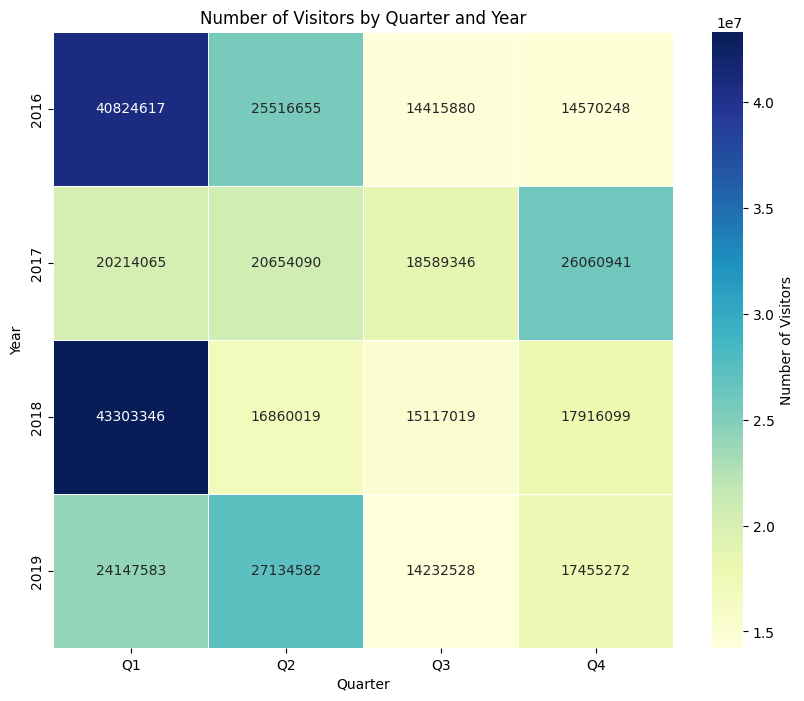

In [51]:
#Pivot the DataFrame to have quarters as columns, years as rows, and 'total_visitors' as values
df_heatmap = df.pivot_table(index='year', columns='quarter', values='Total_visitors', aggfunc='sum')

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Number of Visitors'})
plt.title('Number of Visitors by Quarter and Year')
plt.xlabel('Quarter')
plt.ylabel('Year')
plt.show()

Percentage Distribution of Visitors by Districts


Total district visitors by each district
district
Adilabad                     7321607
Bhadradri Kothagudem        21600962
Hyderabad                   84945858
Jagtial                     11303514
Jangaon                       826282
Jayashankar Bhoopalpally    19634117
Jogulamba Gadwal             6814285
Kamareddy                       1773
Karimnagar                   9462383
Khammam                      9378315
Komaram Bheem Asifabad         92734
Mahabubabad                   600697
Mahbubnagar                 17182400
Mancherial                    867252
Medak                       20542639
Medchal                            0
Mulugu                       1820375
Nagarkurnool                 7425116
Nalgonda                     6401933
Nirmal                      13315798
Nizamabad                     116152
Peddapalli                     56977
Rajanna Sircilla            41763276
Ranga Reddy                        0
Sangareddy                  10424510
Siddipet                 

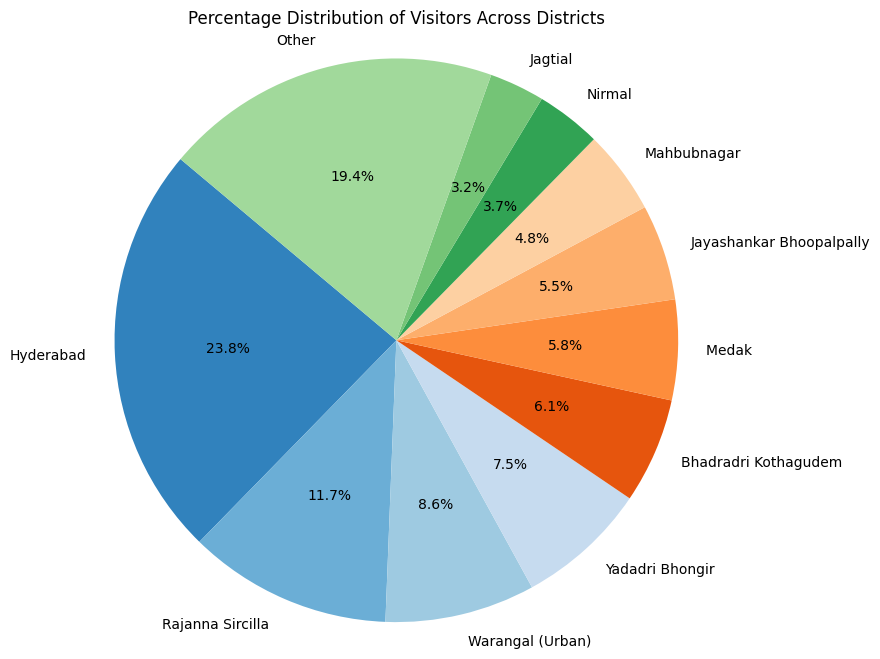

In [54]:
district_visitors = df.groupby('district')['Total_visitors'].sum()
print("Total district visitors by each district")
print(district_visitors)
sorted_districts = district_visitors.sort_values(ascending=False)
print("Total district visitors by each district in sorted form")
print(sorted_districts)

#Separating the largest 10 districts
top_districts = sorted_districts[:10]
print("Top 10 districts ")
print(top_districts)
other_districts = sorted_districts[10:]
print("Remaining districts")
print(other_districts)

#Combining all other districts into a single slice
other_total = other_districts.sum()
print("Total other total districts ")
print(other_total)

#Preparing the datat
labels = list(top_districts.index) + ['Other']
sizes = list(top_districts) + [other_total]
colors = plt.cm.tab20c.colors[:len(labels)]

#Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Visitors Across Districts')
plt.axis('equal')
plt.show()